In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Indian_Kids_Screen_Time.csv', keep_default_na=False)

In [3]:
print(data.shape)
print(data.size)
print(data.columns)
print(data.ndim)
print(data.dtypes)

(9712, 8)
77696
Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')
2
Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object


In [4]:
#checking for missing values
print(data.isna().sum())

Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64


In [5]:
#checking for duplicates
print(data.duplicated().sum())

44


In [6]:
data.drop_duplicates(inplace = True)

In [7]:
print(data.duplicated().sum())

0


In [8]:
print(data.head())

   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                    None          Urban  
4     Poor Sleep, Anx

In [9]:
print(data.describe(include='all'))

                Age Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
count   9668.000000   9668               9668.000000           9668   
unique          NaN      2                       NaN              4   
top             NaN   Male                       NaN     Smartphone   
freq            NaN   4928                       NaN           4540   
mean      12.992760    NaN                  4.367780            NaN   
std        3.158931    NaN                  1.703002            NaN   
min        8.000000    NaN                  0.000000            NaN   
25%       10.000000    NaN                  3.427500            NaN   
50%       13.000000    NaN                  4.440000            NaN   
75%       16.000000    NaN                  5.380000            NaN   
max       18.000000    NaN                 13.890000            NaN   

       Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
count                        9668                        9668.000000   
uni

In [10]:
#No: of female & male respondents
a = data.groupby("Gender") ["Gender"].count()
print(a)

Gender
Female    4740
Male      4928
Name: Gender, dtype: int64


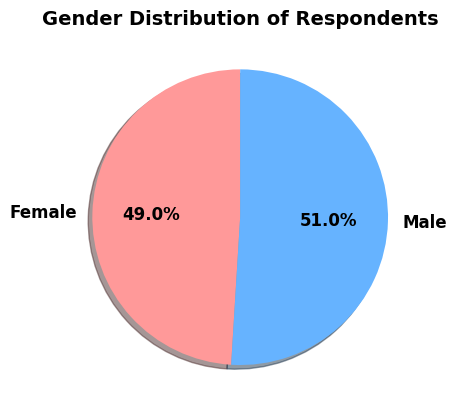

In [ ]:
colors = ['#ff9999','#66b3ff']
plt.pie(
    a.values, 
    labels=a.index, 
    autopct="%1.1f%%",   #to show % on slice upto 1 decimal
    startangle=90,       #to rotate the chart
    colors=colors,
    shadow=True,
    textprops={'fontsize':12, 'weight':'bold'}      #size of font and thickness of text
)

plt.title("Gender Distribution of Respondents", fontsize=14, weight='bold')
plt.show()

The proportion of male and female respondents are similar

In [12]:
#No: of rural and urban respondent
b = data.groupby("Urban_or_Rural") ["Urban_or_Rural"].count()
print(b)

Urban_or_Rural
Rural    2858
Urban    6810
Name: Urban_or_Rural, dtype: int64


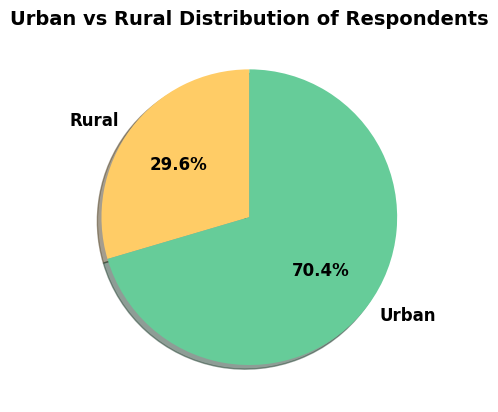

In [13]:
colors = ['#ffcc66', '#66cc99']
plt.pie(
    b.values, 
    labels=b.index, 
    autopct="%1.1f%%", 
    startangle=90, 
    colors=colors,
    shadow=True,
    textprops={'fontsize':12, 'weight':'bold'}
)

plt.title("Urban vs Rural Distribution of Respondents", fontsize=14, weight='bold')
plt.show()

There are more respondents from urban areas than rural

In [14]:
#How many people exceed the recommended screen time
c = data.groupby("Exceeded_Recommended_Limit") ["Exceeded_Recommended_Limit"].count()
print(c)

Exceeded_Recommended_Limit
False    1376
True     8292
Name: Exceeded_Recommended_Limit, dtype: int64


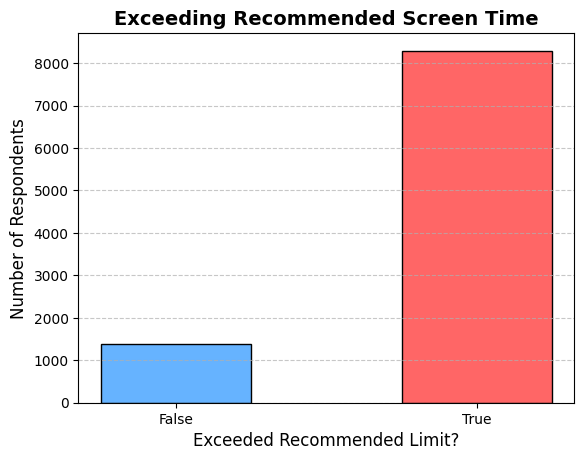

In [15]:
bars = plt.bar(c.index.astype(str), c.values, color=['#66b3ff','#ff6666'], width=0.5, edgecolor='black')

plt.title("Exceeding Recommended Screen Time", fontsize=14, weight='bold')
plt.xlabel("Exceeded Recommended Limit?", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Majority of the repondents exceed the recomended limit

In [16]:
#Are male or female respondents more likely to exceed recommended time
d = data.groupby("Gender")["Exceeded_Recommended_Limit"].value_counts().unstack()
print(d)

Exceeded_Recommended_Limit  False  True 
Gender                                  
Female                        720   4020
Male                          656   4272


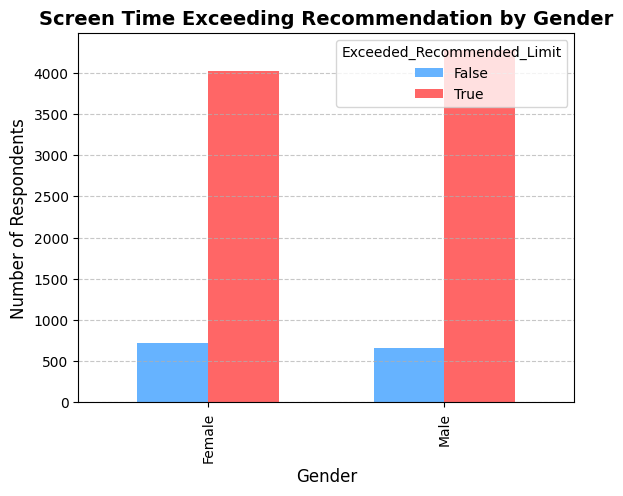

In [17]:
d.plot(
    kind='bar', 
    color=['#66b3ff','#ff6666'],  
    width=0.6
)

plt.title("Screen Time Exceeding Recommendation by Gender", fontsize=14, weight='bold')
plt.ylabel("Number of Respondents", fontsize=12)
plt.xlabel("Gender", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Similar proportion of males and females exceed the recomended time

In [18]:
#Age and exceeding time limit
e = data.groupby("Age")["Exceeded_Recommended_Limit"].value_counts().unstack()
print(e)

Exceeded_Recommended_Limit  False  True 
Age                                     
8                             217    683
9                             228    647
10                            224    639
11                             88    775
12                             85    782
13                             95    815
14                             85    810
15                             95    769
16                             78    796
17                            101    817
18                             80    759


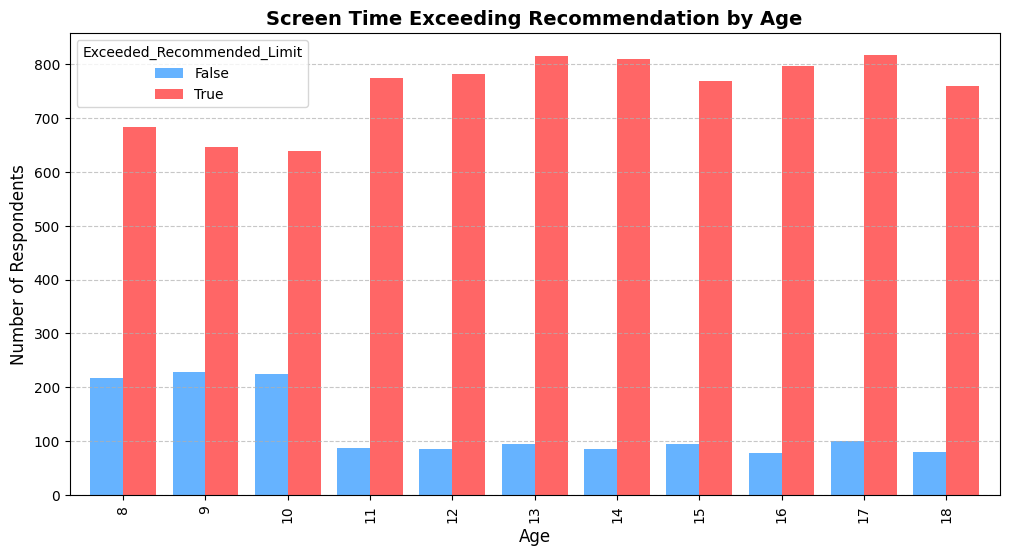

In [19]:
e.plot(
    kind='bar', 
    figsize=(12,6),  # wider figure for many age groups
    color=['#66b3ff','#ff6666'],  # No = blue, Yes = red
    width=0.8
)

plt.title("Screen Time Exceeding Recommendation by Age", fontsize=14, weight='bold')
plt.ylabel("Number of Respondents", fontsize=12)
plt.xlabel("Age", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Across every age group, more number of respondents exceeded the recommended limit than adhere to it

In [20]:
#How many report health impact
data['Health_Impact_Binary'] = np.where(
    data['Health_Impacts'].str.lower().isin(['none', 'no', 'no impact', 'nil']),
    'No',
    'Yes'
)
f = data["Health_Impact_Binary"].value_counts()
print(f)

Health_Impact_Binary
Yes    6488
No     3180
Name: count, dtype: int64


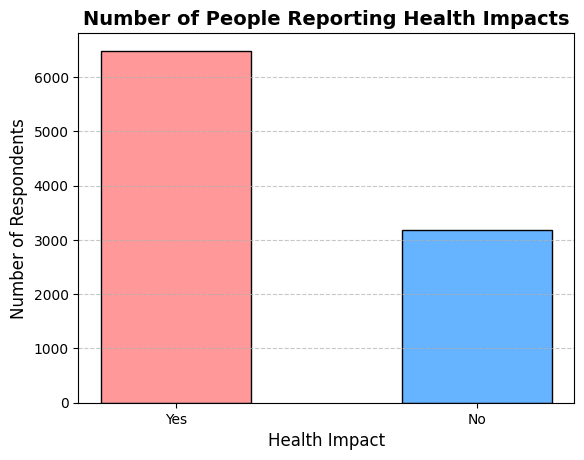

In [21]:
bars = plt.bar(f.index, f.values, color=['#ff9999','#66b3ff'], edgecolor='black', width=0.5)

plt.title("Number of People Reporting Health Impacts", fontsize=14, weight='bold')
plt.xlabel("Health Impact", fontsize=12)
plt.ylabel("Number of Respondents", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Majority of repondents faced at least some kind of health impact

In [22]:
#Which device is mainly used by respondents
g = data['Primary_Device'].value_counts()
print(g)

Primary_Device
Smartphone    4540
TV            2478
Laptop        1431
Tablet        1219
Name: count, dtype: int64


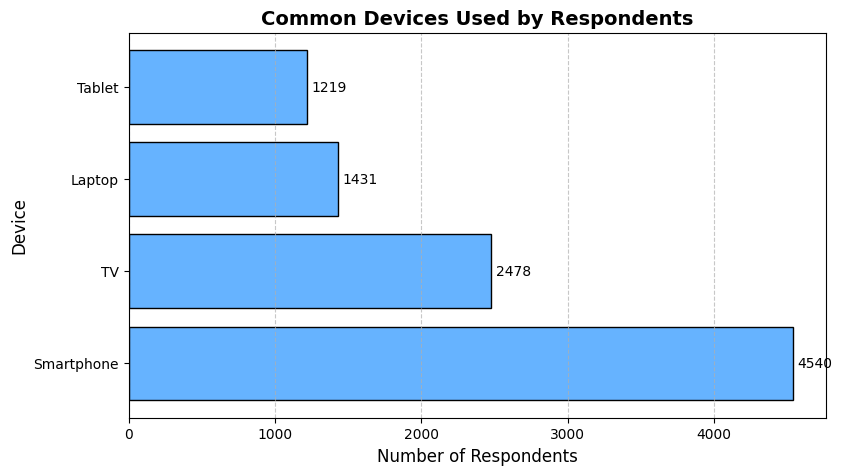

In [ ]:
plt.figure(figsize=(9,5))
plt.barh(g.index, g.values, color='#66b3ff', edgecolor='black')
plt.bar_label(bars, labels=[str(int(v)) for v in g.values], padding=3)   #converts the numbers into strings & padding - spacing
plt.title("Common Devices Used by Respondents", fontsize=14, weight='bold')
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Device", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Smartphone is the most common device used

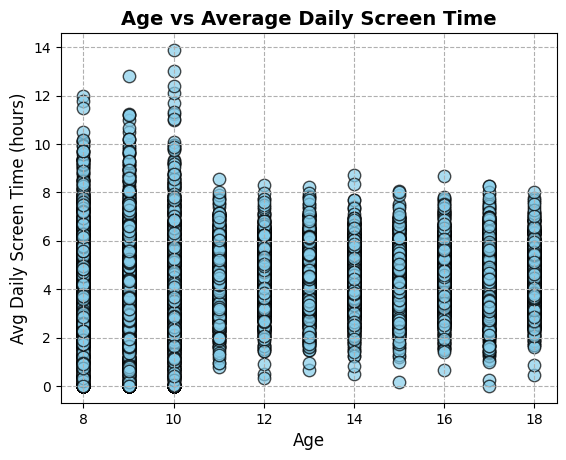

In [ ]:
#Does age affect screen time
plt.scatter(
    data['Age'], 
    data['Avg_Daily_Screen_Time_hr'], 
    color='skyblue', 
    alpha=0.7, 
    s=80,      #size of dots
    edgecolor='black'
)

plt.title("Age vs Average Daily Screen Time", fontsize=14, weight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Avg Daily Screen Time (hours)", fontsize=12)
plt.grid(True, linestyle='--')
plt.show()

There is more variability in the useage times of younger respondents. It is more stable in the 11 and above age group   

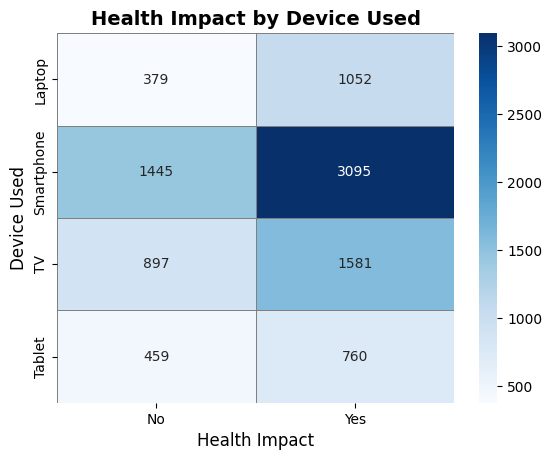

In [ ]:
#Health impact by type of device used
device_health = pd.crosstab(data['Primary_Device'], data['Health_Impact_Binary'])
sns.heatmap(
    device_health, 
    annot=True,       #display number in each cell
    fmt='d',          #formats annotations as integer
    cmap='Blues',   
    linewidths=0.5, 
    linecolor='gray'
)

plt.title("Health Impact by Device Used", fontsize=14, weight='bold')
plt.ylabel("Device Used", fontsize=12)
plt.xlabel("Health Impact", fontsize=12)
plt.show()

Smartphone users reported the highest number of health impacts, followed by TV, Laptop and Tablet users

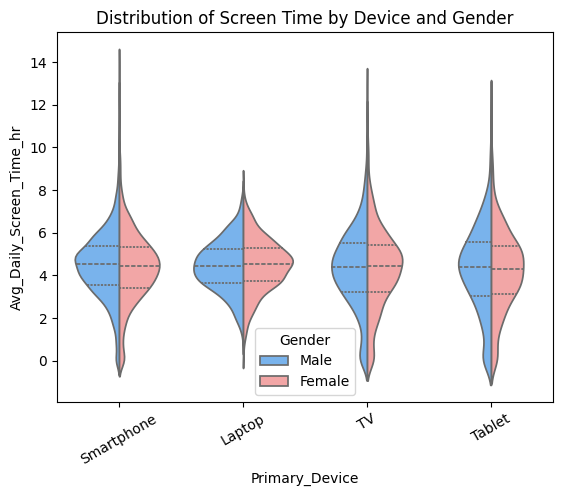

In [ ]:
#Screen Time by Device and Gender

custom_colors = ['#66b3ff', '#ff9999']
sns.violinplot(data=data, x="Primary_Device", y="Avg_Daily_Screen_Time_hr", 
               hue="Gender",    #splits the data by gender
               split=True,      #combines both genders into one volin shape per device
               inner="quartile", #shows quartile values
               palette=custom_colors)
plt.title("Distribution of Screen Time by Device and Gender")
plt.xticks(rotation=30)   #rotates device name for readability
plt.show()

The plot shows that average daily screen time varies across devices but remains similar between genders

In [ ]:
#Age, Screen Time, Educational Ratio change
#Parallel Categories Chart

import plotly.express as px

fig = px.parallel_categories(
    data,
    dimensions=["Gender", "Urban_or_Rural", "Primary_Device", "Health_Impact_Binary"],
    color="Avg_Daily_Screen_Time_hr",        #colours each path based on screen time
    color_continuous_scale=px.colors.sequential.Plasma_r,
    title="Parallel Categories: Gender, Location, Device & Health Impact",
)
fig.show()


Urban users have higher screen time and more health impacts, while rural users show lower screen time and fewer health issues.

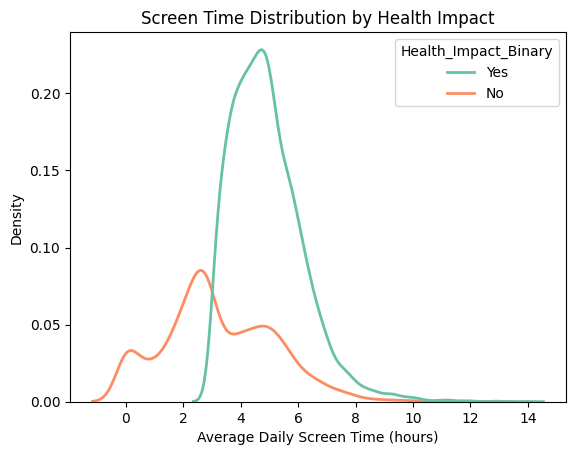

In [ ]:
#Matplotlib KDE Plot — Screen Time Distribution by Health Impact 
sns.kdeplot(
    data=data,
    x="Avg_Daily_Screen_Time_hr",
    hue="Health_Impact_Binary",    #creates sparate curves
    palette="Set2",   
    linewidth=2            #thickness of the curves
)

plt.title("Screen Time Distribution by Health Impact")
plt.xlabel("Average Daily Screen Time (hours)")
plt.show()


Health impacts are most often reported at 4–6 hoursof average daily useage, while non‑reporters show more varied usage with a peak just after 2 hours.

In [ ]:
import plotly.express as px

# Box Plot of Educational Ratio by Gender
fig_box = px.box(
    data,
    x="Gender",
    y="Educational_to_Recreational_Ratio",
    color="Gender",    #each gender gets different colour
    title="Distribution of Educational to Recreational Ratio by Gender",
    points="all",  # shows all data points
    hover_data=["Age", "Primary_Device"]    #data to be shown while hovering 
)
fig_box.update_layout(
    xaxis_title="Gender",
    yaxis_title="Educational to Recreational Ratio",
    template="plotly_white"     #background colour
)
fig_box.show()

Both males and females spend a similar amount of time on educational activities compared to recreational ones, with no noticeable difference in their patterns

In [ ]:
#Facet Grid by Gender

import altair as alt
alt.data_transformers.disable_max_rows()   #disable default row limit of 5000
#mark points - draws filled points
facet = alt.Chart(data).mark_point(filled=True, size=60, opacity=0.6).encode(
    x='Age:Q',     #quantitative
    y='Avg_Daily_Screen_Time_hr:Q',   #quantitative
    color='Health_Impact_Binary:N',   #categorical (nominal)
    tooltip=['Age', 'Avg_Daily_Screen_Time_hr', 'Gender', 'Health_Impact_Binary']   #values to show when hovering
).facet(
    column='Gender:N'    #splits chart based on gender
).properties(
    title='Age vs Screen Time Grouped by Gender'
)

facet

alt.FacetChart(...)

As screen time increases health impact also increases